In [1]:
import numpy as np
import tensorflow as tf
import os

In [9]:
X_train = np.load('data/X_train.npy')
X_test = np.load('data/X_test.npy')
y_train = np.load('data/y_train.npy')

In [10]:

# kiểm tra số mẫu dữ liệu
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)


(60000, 784)
(60000,)
(10000, 784)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10444\3155010938.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


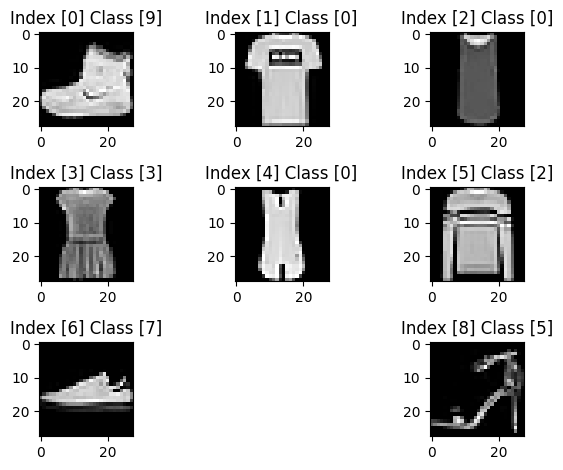

In [8]:
import matplotlib.pyplot as plt # data visualization
np.random.seed(2);
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[[i]].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Index {} Class {}".format([i], y_train[[i]]))
    plt.tight_layout()